# House prices prediction (DATA LIT)

### GitHub repository: https://github.com/guillainbisimwa/Data-lit/blob/master/week4/House-prices-prediction.ipynb

### Owner: GuillainBISIMWA

- GitHub: https://github.com/guillainbisimwa
- Twitter: https://twitter.com/gullain_bisimwa
- YouTube: https://www.youtube.com/guillainbisimwa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

In [4]:
%matplotlib inline

## 1. Import data

In [5]:
train_data = pd.read_csv('Data-house/train.csv')
test_data = pd.read_csv('Data-house/test.csv')

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Looking at the most correlated variables  

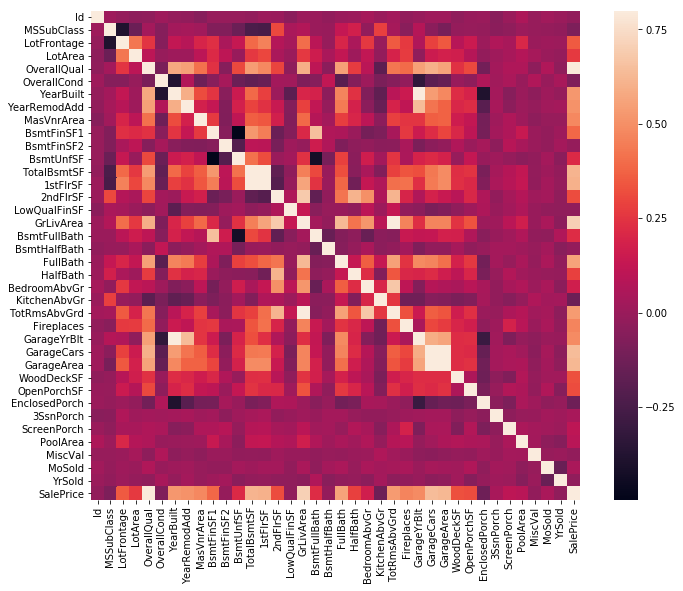

In [7]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sn.heatmap(corrmat, vmax=.8, square=True);

In [8]:
data_pice = train_data['SalePrice']
id_test = test_data['Id']

In [9]:
train_data = train_data[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']]

In [10]:
test_data = test_data[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']]

In [11]:
train_data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt
0,7,1710,2,856,2,8,2003
1,6,1262,2,1262,2,6,1976
2,7,1786,2,920,2,6,2001
3,7,1717,3,756,1,7,1915
4,8,2198,3,1145,2,9,2000


In [12]:
test_data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt
0,5,896,1.0,882.0,1,5,1961
1,6,1329,1.0,1329.0,1,6,1958
2,5,1629,2.0,928.0,2,6,1997
3,6,1604,2.0,926.0,2,7,1998
4,8,1280,2.0,1280.0,2,5,1992


## Check if there are NaN values

In [13]:
train_data.isnull().sum().sort_values(ascending=False)

YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
TotalBsmtSF     0
GarageCars      0
GrLivArea       0
OverallQual     0
dtype: int64

In [14]:
test_data.isnull().sum().sort_values(ascending=False)

TotalBsmtSF     1
GarageCars      1
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
GrLivArea       0
OverallQual     0
dtype: int64

## Fill the NaN values to zero

In [15]:
mode = test_data['TotalBsmtSF'].mode()[0]
test_data['TotalBsmtSF'].fillna(value=mode, inplace=True)

In [16]:
mode = test_data['GarageCars'].mode()[0]
test_data['GarageCars'].fillna(value=mode, inplace=True)

In [17]:
test_data.isnull().sum().sort_values(ascending=False)

YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
TotalBsmtSF     0
GarageCars      0
GrLivArea       0
OverallQual     0
dtype: int64

## Decision tree and linear regressor for prediction.

In [18]:
decision_tr = DecisionTreeRegressor(min_samples_split=10)
decision_tr.fit(train_data, data_pice)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
decision_tr.score(train_data, data_pice)

0.9593120381386189

In [20]:
linear_ridge = Ridge()
linear_ridge.fit(train_data, data_pice)
linear_ridge.score(train_data, data_pice)

0.7686523322431337

In [21]:
predict_ = linear_ridge.predict(test_data)
predict_

array([108143.97209609, 164093.09941591, 170633.04790584, ...,
       149911.39515133, 108641.14665802, 246535.02163582])

## Final result

In [22]:
final_df = pd.DataFrame()
final_df['Id'] = id_test
final_df['SalePrice'] = predict_
final_df.to_csv('submission.csv',index=False)